In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_probability as tfp
from tensorflow.keras import backend
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
import matplotlib.pyplot as plt
import numpy 
import gym

# for version issues
import warnings
warnings.filterwarnings("ignore")

In [7]:
class ActorCriticNetLayers(Model):

    def __init__(self, n_actions):
        super(ActorCriticNetLayers, self).__init__()
        self.n_actions = n_actions
        self.hidden1 = layers.Dense(1024, activation='relu')
        self.hidden2 = layers.Dense(512, activation='relu')
        self.hidden3 = layers.Dense(256, activation='relu')
        self.hidden4 = layers.Dense(128, activation='relu')
        self.in_ = layers.Dense(1, activation=None)
        self.out_ = layers.Dense(n_actions, activation='softmax')

    def call(self, state):
        x = self.hidden1(state)
        x = self.hidden2(x)
        x = self.hidden3(x)
        x = self.hidden4(x)
        x = self.in_(x)
        y = self.out_(x)
        return x, y

class ActorCritic: 

    def __init__ (self, alpha, beta, in_shape, n_actions):
        self.alpha = alpha
        self.beta = beta
        self.in_shape = in_shape
        self.n_actions = n_actions
        self.gamma = .998
        self.actions_space = [i for i in range(self.n_actions)]
        self.actor_critic = ActorCriticNetLayers(n_actions=self.n_actions)
        self.actor_critic.compile(optimizer=Adam(learning_rate=self.alpha))

    def select_action(self, obs):
        state = tf.convert_to_tensor([obs])
        _, probs = self.actor_critic(state)
        action_probs = tfp.distributions.Categorical(probs=probs)
        action = action_probs.sample()
        self.action = action
        action = action.numpy()[0]
        return action

    def train(self, state, reward, new_state, done):
        x = int(done)
        state = tf.convert_to_tensor([state], dtype=tf.float32)
        new_state = tf.convert_to_tensor([new_state], dtype=tf.float32)
        reward = tf.convert_to_tensor(reward, dtype=tf.float32)

        with tf.GradientTape(persistent=True) as t:
            state_value, probs = self.actor_critic(state)
            new_state_value, _ = self.actor_critic(new_state)
            state_value = tf.squeeze(state_value)
            new_state_value = tf.squeeze(new_state_value)
            action_probs = tfp.distributions.Categorical(probs=probs)
            log_prob = action_probs.log_prob(self.action)
            d = reward + self.gamma*new_state_value*(1-x) - state_value
            actor_loss = -log_prob*d
            critic_loss = d**2
            x = actor_loss + critic_loss

        p = self.actor_critic.trainable_variables
        g = t.gradient(x, p)
        self.actor_critic.optimizer.apply_gradients(zip(g, p))


def visualizations(rewards_per_eps):
    eps, rewards = list(), list()
    for item in rewards_per_eps:
      ep, re = abs(item[0]), abs(item[1])
      eps.append(ep)
      rewards.append(re)

    plt.plot(eps, rewards)
    plt.title('Rewards per Episode')
    plt.xlabel('Episode #')
    plt.ylabel('Reward (Cummultive)')
    plt.show()



Part 1

Part I


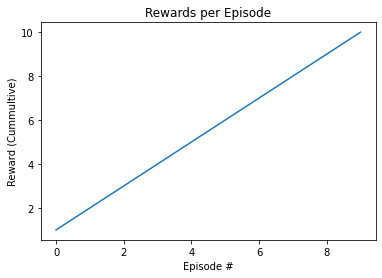

In [8]:
# main loop 
if __name__ == '__main__':

  # env
  env = gym.make("CartPole-v1") 

  alpha, beta = .00001, .00005
  n_actions = 2
  in_shape = 4

  Agent = ActorCritic(alpha, beta, in_shape, n_actions)

  rewards_eps_1 = list()
  r = 0
  eps = 10

  for i in range(eps):

    done = False
    obs = env.reset()

    while not done:

      action = Agent.select_action(obs)
      new_obs, reward, done, info = env.step(action)

      Agent.train(obs, reward, new_obs, done)

      obs = new_obs
    
    r += reward

    rewards_eps_1.append((i, r))

  print('Part I')
  visualizations(rewards_eps_1)

Part 2

a

Part II(a)


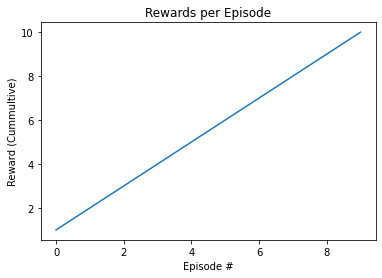

In [5]:
# main loop 
if __name__ == '__main__':

  # env
  env = gym.make("Acrobot-v1") 

  alpha, beta = .00001, .00005
  n_actions = 3
  in_shape = 6
  
  Agent = ActorCritic(alpha, beta, in_shape, n_actions)

  rewards_eps_2a = list()
  r = 0
  eps = 10

  for i in range(eps):

    done = False
    obs = env.reset()

    while not done:

      action = Agent.select_action(obs)
      new_obs, reward, done, info = env.step(action)

      Agent.train(obs, reward, new_obs, done)

      obs = new_obs
    
    r += reward

    rewards_eps_2a.append((i, r))

  print('Part II(a)')
  visualizations(rewards_eps_2a)

b

Part II(b)


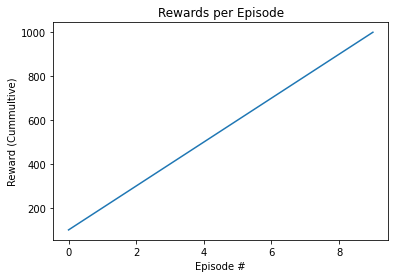

In [6]:
# main loop 
if __name__ == '__main__':

  # env
  env = gym.make("LunarLander-v2")

  alpha, beta = .00001, .00005
  n_actions = 4
  in_shape = 8

  Agent = ActorCritic(alpha, beta, in_shape, n_actions)

  rewards_eps_2b = list()
  r = 0
  eps = 10

  for i in range(eps):

    done = False
    obs = env.reset()

    while not done:

      action = Agent.select_action(obs)
      new_obs, reward, done, info = env.step(action)

      Agent.train(obs, reward, new_obs, done)

      obs = new_obs

    r += reward

    rewards_eps_2b.append((i, r))

  print('Part II(b)')
  visualizations(rewards_eps_2b)